# 模型服务示例

### 初始化SDK与Anylearn后端引擎连接

In [1]:
from anylearn.config import init_sdk
init_sdk('http://192.168.10.22:31888', 'xlearn', '123456')

### 获取模型服务列表

In [2]:
from anylearn.interfaces.service import (
    Service, ServiceVisibility, ServiceState,
    ServiceRecord, ServiceRecordState
)

print("****** Test list ******")
services = Service.get_list()
for i, s in enumerate(services):
    print(f"{i} => {repr(s)}")
print("------\n")

****** Test list ******
0 => Service(name='TestYolov5Prod25', description='', state=1, visibility=1, creator_id='USERfb6c6d2111eaadda13fd17feeac7', owner=['USERfb6c6d2111eaadda13fd17feeac7'], model_id='MODEb7c2774811eba077fa1edeb86e18', address='/serving/10.105.139.107', secret_key='SKEY9ab2a3f611ebbbc9fefe5ac25f78', envs=None, replicas=1, gpu_num=0, gpu_mem=1, create_time='2021-04-23 13:40:07', id='SERVa47ea3f611ebbbc9fefe5ac25f78')
------



### 取得YOLOv5模型服务

In [3]:
service = next(s for s in services if s.name == "TestYolov5Prod25")
service.get_detail()
service

Service(name='TestYolov5Prod25', description='', state=1, visibility=1, creator_id='USERfb6c6d2111eaadda13fd17feeac7', owner=['USERfb6c6d2111eaadda13fd17feeac7'], model_id='MODEb7c2774811eba077fa1edeb86e18', address='/serving/10.105.139.107', secret_key='SKEY9ab2a3f611ebbbc9fefe5ac25f78', envs='', replicas=1, gpu_num=0, gpu_mem=1, create_time='2021-04-23 13:40:07', id='SERVa47ea3f611ebbbc9fefe5ac25f78')

### 准备推理测试数据（保养图片）

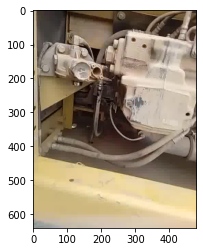

In [4]:
%matplotlib inline

import os

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

test_img_path = "../../resources/img/ty_03_01507.jpg"
img = mpimg.imread(test_img_path)
plt.imshow(img)

In [5]:
labels = [
    "jiyoukou",
    "chaiyouculv",
    "lvbei",
    "chaiyouxilv",
    "jiyoulvxin",
    "chaiyouculv-1",
    "chaiyouxilv-1",
    "jiyoulvxin-1",
    "chaiyouxianghuxi-1",
    "huxilvxin",
    "huxilvxingai",
    "konglvdizuo",
    "xikonglv",
    "cukonglv",
    "yeyayouxianghuiyoulv-1",
    "yeyayouhuiyoulvxin",
    "yeyayouhuxi-1",
    "yeyayouxiyoulvxin",
    "yeyayouxiyoulvxingai",
    "yeyayouxiangjiayoukoudakai",
    "zhongchuandong",
    "xianshiping",
    "fushuixiang",
    "kongtiaolvxin",
    "wudihubanjicang",
]

### 调用模型服务的推理接口

In [6]:
with open(test_img_path, "rb") as fb:
    results, record = service.predict_online(file_binary = fb)
record

ServiceRecord(service_id='SERVa47ea3f611ebbbc9fefe5ac25f78', inference_data_file_id='ty_03_01507.jpg', state=2, create_time='2021-05-21 14:34:12', finish_time='2021-05-21 14:34:13', result='{"ty_03_01507.jpg": "{\\"object\\": [[0.06298828125, 0.11171875149011612, 0.44580078125, 0.35546875, 5, 0.9521484375]]}"}', error=None, id='SERE403ab9fe11ebba98fee43478d3d2')

### 展示推理结果

In [7]:
H, W = len(img), len(img[0])
results = [[r[0] * W, r[1] * H, r[2] * W, r[3] * H, r[4], r[5]]
           for r in results if len(r) == 6]
results

[[30.234375, 71.50000095367432, 213.984375, 227.5, 5, 0.9521484375]]

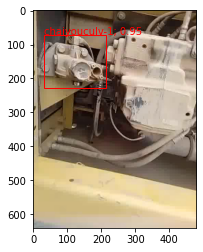

In [8]:
from matplotlib.patches import Rectangle
overlays = [Rectangle((r[0], r[1]), r[2]-r[0], r[3]-r[1], linewidth=1, edgecolor='r', facecolor='none')
            for r in results]
[plt.gca().add_patch(o) for o in overlays]
[plt.annotate(f"{labels[r[4]]}; {round(r[5], 2)}", (r[0], r[1]), color="r") for r in results]
plt.imshow(img)